# Exercise 1: Linear regression with multiple variables

In [1]:
%matplotlib inline

import numpy as np
from numpy import loadtxt, hstack, zeros, ones, dot, transpose, array
from matplotlib import cm
from matplotlib.pyplot import plot, ylabel, xlabel, subplots
from sklearn.preprocessing import Normalizer

## Part 1: Feature Normalization

In [2]:
# load data

data = loadtxt('ex1data2.txt', delimiter=',')
X, y = data[:, 0:2].reshape(-1, 2), data[:, 2].reshape(-1, 1)
m = len(y)

print(f'''First 10 examples from the dataset:
x = {X[0:10, :]},
y = {y[0:10, :]}''')

First 10 examples from the dataset:
x = [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]],
y = [[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]
 [314900.]
 [198999.]
 [212000.]
 [242500.]]


In [3]:
# normaliz features
normalizer_x = Normalizer().fit(X)
X = normalizer_x.transform(X)

# add intercept term to X
X = hstack((ones((m, 1)), X))

## Part 2: Gradient Descent

In [4]:
alpha = 0.01
num_iters = 400

theta = zeros((3, 1))

def h(theta, X):
    return dot(X, theta)

def computeCostMulti(X, y, theta):
    m = y.size
    temp = h(theta, X) - y
    return dot(transpose(temp), temp) / (2 * m)

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = zeros((num_iters, 1))
    
    for i in range(0, num_iters):
        theta -= alpha / m * dot(transpose(X), h(theta, X) - y)
        J_history[i, 0] = computeCostMulti(X, y, theta)
        
    return theta, J_history

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

Text(0,0.5,'Cost J')

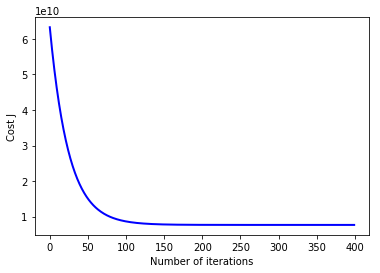

In [5]:
# plot the convergence graph

fig, ax = subplots()
ax.plot(range(len(J_history)), J_history, '-b', linewidth=2)
xlabel('Number of iterations')
ylabel('Cost J')

In [6]:
print(f'''Theta computed from gradient descent:
{theta}''')

# Estimate the price of a 1650 sq-ft, 3 br house
price = dot(hstack([ones((1, 1)), normalizer_x.transform(array([1650.0, 3.0]).reshape(-1, 2))]),
            theta)

print(f'''Predicted price of a 1650 sq-ft, 3 br house
(using gradient descent): ${price[0, 0]:.2f}''')

Theta computed from gradient descent:
[[1.70153701e+05]
 [1.70153677e+05]
 [1.45682035e+02]]
Predicted price of a 1650 sq-ft, 3 br house
(using gradient descent): $340307.36


## Part 3: Normal Equations

*not implemented*